In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
data=pd.read_excel('PERL Research Data.xlsx')

These are three functions that will allow you to run a comparitive analysis in the form of two bar plots on select columns. This function only works for yes or no questions to compare with other yes or no questions.  There is a little bit of important syntax however.  Some columns represent yes's as "Checked", while some represent yes's as "Yes". Same thing applies to no's. Some columns use "Unchecked" while some use "No". So, because of this variability, we must make three functions to account for this.  We need:
#1 1 column "Yes"/"No" and 1 column "Checked"/"Unchecked"
#2 both columns "Yes"/"No"
#3 both columns "Checked"/"Unchecked"

It is important to know which column represents which in the 1st function because if you switch up the "Checked" column variable with the "Yes" column variable, the function will not work.

These functions will spit out two bar plots that essentially compare Q1:Yes Q2:Yes, Q1:Yes Q2:No, Q1:No Q2:Yes, and Q1:No Q2:No percentages.

The functions will also spit out four numbers. These numbers represent the actual number of people who answered
yes to both, yes to 1 no to 2, no to 1 yes to 2, and no to both repectively. You can use these numbers to check and see if the contingency tables are correct.

95 377 37 87


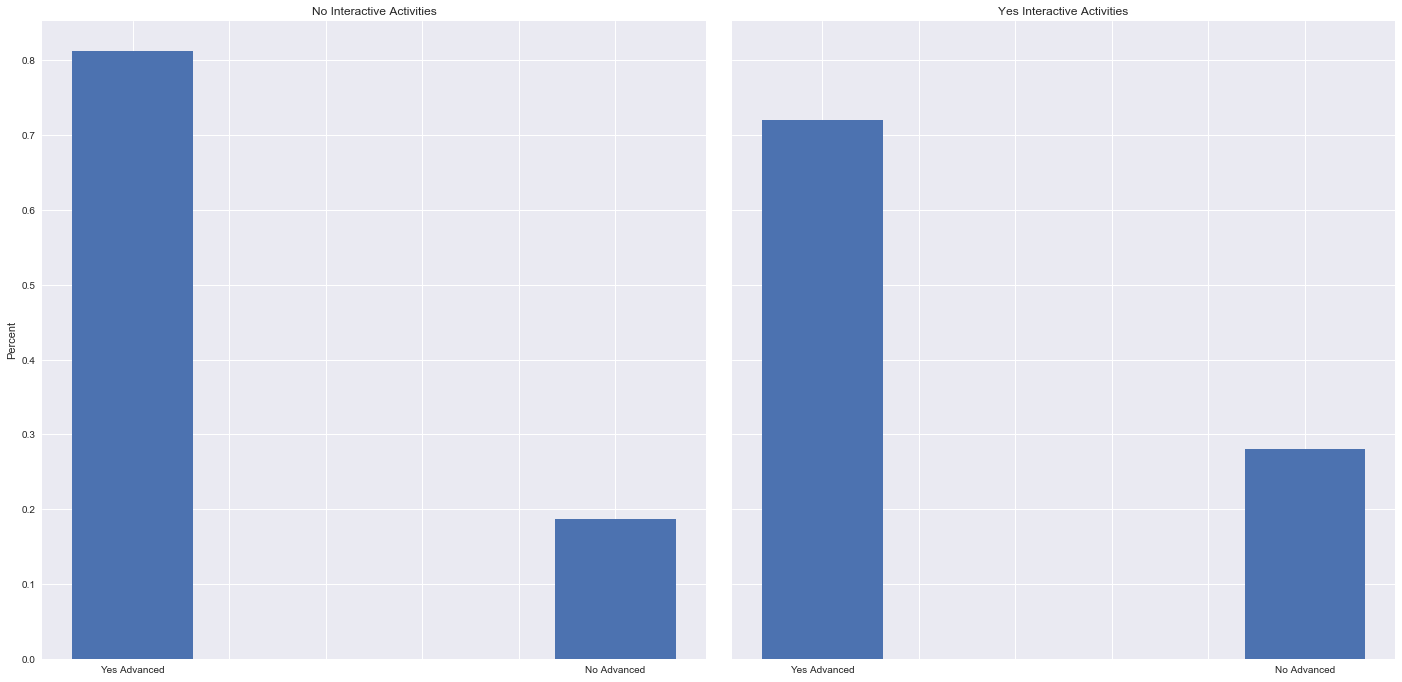

In [2]:
#The parameters of this function are:
#column_compare_number1: this is the column number of the first question you want to compare.
#remember, python starts at zero when referencing indices
#column_compare_number2: this is the column number of the second question you want to compare.
#The_label_of_column1=input(): This will prompt you to input something after you run the function.
#You DO NOT need to place any other parameters besides the first two into your function
#You will first be prompted to type in the data label for the first question, then the second. 
#you type the data label in then hit enter. You will do this twice then the function will run.
#column_compare_number1 must be the "Checked"/"Unchecked" question column number
#column_compare_number2 must be the "Yes"/"No" question column number

def Function1_Checked_Yes(column_compare_number1,column_compare_number2,
                            The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    
    column_compare_number1_list= []
    for row in data.values[:,column_compare_number1]:
        column_compare_number1_list.append(row)
    column_compare_number2_list = []
    for row in data.values[:,column_compare_number2]:
        column_compare_number2_list.append(row)
    yes=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Yes" and j == "Checked":
            yes+=1
    yes1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "No" and j == "Checked":
            yes1+=1
    no=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Yes" and j == "Unchecked":
            no+=1
    no1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "No" and j == "Unchecked":
            no1+=1
    print(yes,yes1,no,no1)
    Percent_1 = yes/(yes+no) 
    Percent_2 = yes1/(yes1+no1) 
    Percent_3 = no/(yes+no) 
    Percent_4 = no1/(yes1+no1) 
    x=[1,2] 
    y=[Percent_1,Percent_3] 
    y1=[Percent_2,Percent_4]
    
    fig = plt.figure(figsize=(8,6))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,10))
    ax1.bar(x,y1,width=.25)
    ax2.bar(x,y,width=.25)
    ax1.set_title('No '+str(The_label_of_column2))
    ax2.set_title('Yes '+str(The_label_of_column2))
    ax1.set( ylabel='Percent')
    ax1.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    ax2.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    sns.set(font_scale=2)
    plt.tight_layout()
    plt.show()

Function1_Checked_Yes(11,33,"Advanced","Interactive Activities")

In [3]:
#The parameters of this function are:
#column_compare_number1: this is the column number of the first question you want to compare.
#remember, python starts at zero when referencing indices
#column_compare_number2: this is the column number of the second question you want to compare.
#The_label_of_column1=input(): This will prompt you to input something after you run the function.
#You DO NOT need to place any other parameters besides the first two into your function
#You will first be prompted to type in the data label for the first question, then the second. 
#you type the data label in then hit enter. You will do this twice then the function will run.

def Function2_Yes_Yes(column_compare_number1,column_compare_number2,
                                           The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    
    column_compare_number1_list= []
    for row in data.values[:,column_compare_number1]:
        column_compare_number1_list.append(row)
    column_compare_number2_list = []
    for row in data.values[:,column_compare_number2]:
        column_compare_number2_list.append(row)
    yes=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Yes" and j == "Yes":
            yes+=1
    yes1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "No" and j == "Yes":
            yes1+=1
    no=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Yes" and j == "No":
            no+=1
    no1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "No" and j == "No":
            no1+=1
    print(yes,yes1,no,no1)
    Percent_1 = yes/(yes+no) 
    Percent_2 = yes1/(yes1+no1) 
    Percent_3 = no/(yes+no) 
    Percent_4 = no1/(yes1+no1) 
    x=[1,2] 
    y=[Percent_1,Percent_3] 
    y1=[Percent_2,Percent_4]
    
    fig = plt.figure(figsize=(8,6))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,10))
    ax1.bar(x,y1,width=.25)
    ax2.bar(x,y,width=.25)
    ax1.set_title('No '+str(The_label_of_column2))
    ax2.set_title('Yes '+str(The_label_of_column2))
    ax1.set( ylabel='Percent')
    ax1.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    ax2.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    sns.set(font_scale=2)
    plt.tight_layout()
    plt.show()

In [4]:
#The parameters of this function are:
#column_compare_number1: this is the column number of the first question you want to compare.
#remember, python starts at zero when referencing indices
#column_compare_number2: this is the column number of the second question you want to compare.
#The_label_of_column1=input(): This will prompt you to input something after you run the function.
#You DO NOT need to place any other parameters besides the first two into your function
#You will first be prompted to type in the data label for the first question, then the second. 
#you type the data label in then hit enter. You will do this twice then the function will run.

def Function3_Checked_Checked(column_compare_number1,column_compare_number2,
                                           The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    
    column_compare_number1_list= []
    for row in data.values[:,column_compare_number1]:
        column_compare_number1_list.append(row)
    column_compare_number2_list = []
    for row in data.values[:,column_compare_number2]:
        column_compare_number2_list.append(row)
    yes=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Checked" and j == "Checked":
            yes+=1
    yes1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Checked" and j == "Checked":
            yes1+=1
    no=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Checked" and j == "Unchecked":
            no+=1
    no1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Checked" and j == "Unchecked":
            no1+=1
    print(yes,yes1,no,no1)
    Percent_1 = yes/(yes+no) 
    Percent_2 = yes1/(yes1+no1) 
    Percent_3 = no/(yes+no) 
    Percent_4 = no1/(yes1+no1) 
    x=[1,2] 
    y=[Percent_1,Percent_3] 
    y1=[Percent_2,Percent_4]
    
    fig = plt.figure(figsize=(8,6))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,10))
    ax1.bar(x,y1,width=.25)
    ax2.bar(x,y,width=.25)
    ax1.set_title('No '+str(The_label_of_column2))
    ax2.set_title('Yes '+str(The_label_of_column2))
    ax1.set( ylabel='Percent')
    ax1.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    ax2.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    sns.set(font_scale=2)
    plt.tight_layout()
    plt.show()

These next three functions make a contingency table comparing two diferent yes or no questions. Just like before we need three to cover every variation. The numbers in the table should match the numbers printed in the previous function. The parameters are also the same as before.

In [5]:
# question 1 is "checked"/"Unchecked" and question 2 is "yes"/"no"
def contingency_table_checked_yes_function1(column_compare_number1,column_compare_number2,
                              The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    column_compare_list1 = []
    for row,row2 in zip(data.values[:,column_compare_number1],data.values[:,column_compare_number2]):
        if row == "Checked" and row2 =="Yes" or row == "Unchecked" and row2 == "Yes" or row == "Checked" and row2 == "No" or row == "Unchecked" and row2 == "No":
            column_compare_list1.append(row)
    print(len(column_compare_list1))


    column_compare_list2 = []
    for row,row2 in zip(data.values[:,column_compare_number2],data.values[:,column_compare_number1]):
        if row == "Yes" and row2 =="Checked" or row == "No" and row2 == "Checked" or row == "Yes" and row2 == "Unchecked" or row == "No" and row2 == "Unchecked":
            column_compare_list2.append(row)
    print(len(column_compare_list2))
    
   
    df = pd.DataFrame(np.array(column_compare_list1).reshape(len(column_compare_list1),1))
    df.columns=[str(The_label_of_column1)]
    df2 = pd.DataFrame(np.array(column_compare_list2).reshape(len(column_compare_list2),1))
    df2.columns=[str(The_label_of_column2)]
    Contingency_Table = pd.crosstab(index=df[str(The_label_of_column1)], 
                                columns=df2[str(The_label_of_column2)],
                                 margins=True)   # Include row and column totals

    return(Contingency_Table)
contingency_table_checked_yes_function1(11,33,"Advanced","Interactive Activities")

596
596


Interactive Activities,No,Yes,All
Advanced,,,
Checked,377,95,472
Unchecked,87,37,124
All,464,132,596


In [6]:
# question 1 is "checked"/"Unchecked" and question 2 is "Checked"/"Unchecked"
def contingency_table_checked_checked_function2(column_compare_number1,column_compare_number2,
                              The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    column_compare_list1 = []
    for row,row2 in zip(data.values[:,column_compare_number1],data.values[:,column_compare_number2]):
        if row == "Checked" and row2 =="Checked" or row == "Unchecked" and row2 == "Checked" or row == "Checked" and row2 == "Unchecked" or row == "Unchecked" and row2 == "Unchecked":
            column_compare_list1.append(row)
    print(len(column_compare_list1))


    column_compare_list2 = []
    for row,row2 in zip(data.values[:,column_compare_number2],data.values[:,column_compare_number1]):
        if row == "Checked" and row2 =="Checked" or row == "Unchecked" and row2 == "Checked" or row == "Checked" and row2 == "Unchecked" or row == "Unchecked" and row2 == "Unchecked":
            column_compare_list2.append(row)
    print(len(column_compare_list2))
    
   
    df = pd.DataFrame(np.array(column_compare_list1).reshape(len(column_compare_list1),1))
    df.columns=[str(The_label_of_column1)]
    df2 = pd.DataFrame(np.array(column_compare_list2).reshape(len(column_compare_list2),1))
    df2.columns=[str(The_label_of_column2)]
    Contingency_Table = pd.crosstab(index=df[str(The_label_of_column1)], 
                                columns=df2[str(The_label_of_column2)],
                                 margins=True)   # Include row and column totals

    return(Contingency_Table)

In [7]:
# question 1 is "Yes"/"No" and question 2 is "yes"/"no"
def contingency_table_yes_yes_function3(column_compare_number1,column_compare_number2,
                             The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    column_compare_list1 = []
    for row,row2 in zip(data.values[:,column_compare_number1],data.values[:,column_compare_number2]):
        if row == "Yes" and row2 =="Yes" or row == "No" and row2 == "Yes" or row == "Yes" and row2 == "No" or row == "No" and row2 == "No":
            column_compare_list1.append(row)
    print(len(column_compare_list1))


    column_compare_list2 = []
    for row,row2 in zip(data.values[:,column_compare_number2],data.values[:,column_compare_number1]):
        if row == "Yes" and row2 =="Yes" or row == "No" and row2 == "Yes" or row == "Yes" and row2 == "No" or row == "No" and row2 == "No":
            column_compare_list2.append(row)
    print(len(column_compare_list2))
    
   
    df = pd.DataFrame(np.array(column_compare_list1).reshape(len(column_compare_list1),1))
    df.columns=[str(The_label_of_column1)]
    df2 = pd.DataFrame(np.array(column_compare_list2).reshape(len(column_compare_list2),1))
    df2.columns=[str(The_label_of_column2)]
    Contingency_Table = pd.crosstab(index=df[str(The_label_of_column1)], 
                                columns=df2[str(The_label_of_column2)],
                                 margins=True)   # Include row and column totals

    return(Contingency_Table)